In [75]:
#importing the Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
from sklearn import metrics

In [76]:
#Loading the Dataset
data=pd.read_csv('Heart.csv')
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


The above Dataset is a Classification Dataset we have to predict the AHD attribute

In [77]:
#calculating rows and columns
data.shape

(303, 14)

In [78]:
#finding the null values
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [79]:
#replacing the null values
data['Ca']=data['Ca'].fillna(data['Ca'].mode()[0])
data['Thal']=data['Thal'].fillna(data['Thal'].mode()[0])

In [80]:
data['AHD']=data['AHD'].astype('category')
data['AHD']=data['AHD'].replace({'Yes':1,'No':0})


In [81]:
type(data)

pandas.core.frame.DataFrame

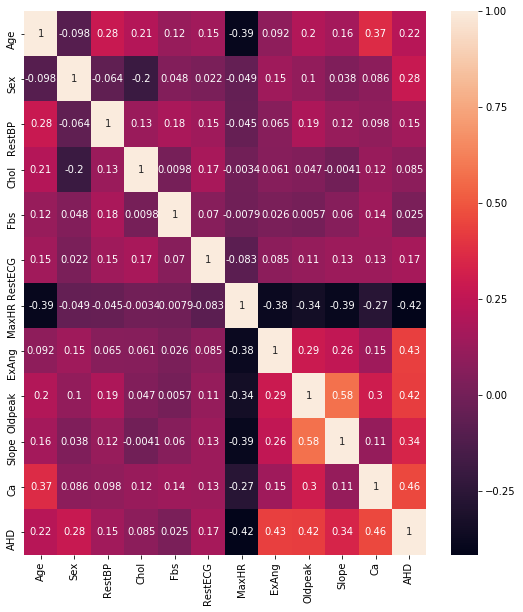

In [82]:
# correlation matrix
plt.figure(figsize=[9,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [83]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

In [84]:
data.Sex.value_counts()# 1 is male nd 0 is female


1    206
0     97
Name: Sex, dtype: int64

In [85]:
data.RestECG.value_counts()

0    151
2    148
1      4
Name: RestECG, dtype: int64

In [86]:
data.Slope.value_counts()

1    142
2    140
3     21
Name: Slope, dtype: int64

In [87]:
data.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [88]:
#data['Sex']=data['Sex'].astype('str')
#data['RestECG']=data['RestECG'].astype('str')
#data['Slope']=data['Slope'].astype('str')
#data['Ca']=data['Ca'].astype('str')

In [89]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

In [90]:
df=pd.get_dummies(data,drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,1,0


In [91]:
x=df.drop(['AHD','Fbs','Age','RestECG','Slope','Thal_normal','RestBP','Chol','ChestPain_typical','ChestPain_nontypical'],axis=1)
y=df['AHD']

In [92]:
lor=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

lor.fit(x_train,y_train)
pred_tr=lor.predict(x_train)
pd.crosstab(y_train,pred_tr)


col_0,0,1
AHD,,
0,100,15
1,21,76


In [93]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
Slope,303.0,1.600660,0.616226,1.0,1.0,2.0,2.0,3.0


In [94]:
#accuracy of train
acc=(101+79)/x_train.shape[0]
print(acc)

0.8490566037735849


In [95]:
lor.fit(x_test,y_test)
pred_test=lor.predict(x_test)
pd.crosstab(y_test,pred_test)

col_0,0,1
AHD,,
0,44,5
1,8,34


In [96]:
#accuracy of test
acc=(44+37)/x_test.shape[0]
print(acc)

0.8901098901098901


In [97]:
x2=add_constant(x_train)
logit=sm.Logit(y_train,x2)
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.371702
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  212
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                  0.4609
Time:                        12:10:27   Log-Likelihood:                -78.801
converged:                       True   LL-Null:                       -146.18
                                        LLR p-value:                 6.347e-26
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7166      1.555      0.461      0.645      -2.331       3.764

In [98]:
pred_train_proba=lor.predict_proba(x_train)
pred_test_proba=lor.predict_proba(x_test)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

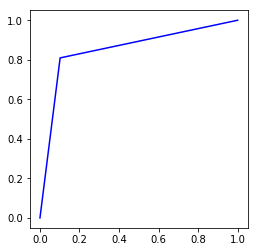

In [99]:
fpr,tpr,thershold=metrics.roc_curve(y_test,pred_test)
plt.plot(fpr,tpr,label='ROC curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [100]:
AUC=metrics.auc(fpr,tpr)
print(AUC)

0.8537414965986394
